<h2>Displays ti_melt model results for all snowy basins in a major basin</h2>


In [1]:
%pylab notebook
import datetime as dt
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as md
from charistools.hypsometry import Hypsometry
from charistools.meltModels import ImshowTriSurfMelt
from charistools.meltModels import PlotTriSurfInput
from charistools.meltModels import PlotTriSurfMelt
from charistools.modelEnv import ModelEnv
from charistools.timeSeries import TimeSeries
import pandas as pd
import re
import os

/Users/brodzik/.conda/envs/charis/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [2]:
%cd /Users/brodzik/projects/CHARIS/derived_hypsometries/MODSCAG_GF_v09/
#%ls

/Users/brodzik/projects/CHARIS/derived_hypsometries/MODSCAG_GF_v09
AM_OBJECTID100/            IN_v01_OBJECTID30/
AM_OBJECTID62/             IN_v01_OBJECTID31/
AM_OBJECTID64/             IN_v01_OBJECTID32/
AM_OBJECTID65/             IN_v01_OBJECTID33/
AM_OBJECTID66/             IN_v01_OBJECTID34/
AM_OBJECTID68/             IN_v01_OBJECTID36/
AM_OBJECTID69/             IN_v01_OBJECTID37/
AM_OBJECTID72/             IN_v01_OBJECTID39/
AM_OBJECTID77/             IN_v01_OBJECTID4/
AM_OBJECTID78/             IN_v01_OBJECTID44/
AM_OBJECTID79/             IN_v01_OBJECTID47/
AM_OBJECTID80/             IN_v01_OBJECTID48/
AM_OBJECTID81/             IN_v01_OBJECTID53/
AM_OBJECTID82/             IN_v01_OBJECTID56/
AM_OBJECTID83/             IN_v01_OBJECTID57/
AM_OBJECTID84/             IN_v01_OBJECTID58/
AM_OBJECTID85/             IN_v01_OBJECTID59/
AM_OBJECTID86/             IN_v01_OBJECTID6/
AM_OBJECTID88/             IN_v01_OBJECTID62/
AM_OBJECTID89/             IN_v01_OBJECTID63/
AM_OBJECTID90/ 

In [3]:
# Generate a list of all OBJECTID basins
majorBasinID = 'IN_v01'
#majorBasinID = 'AM'
#majorBasinID = 'SY'
drainageIDs = glob.glob("%s_OBJECTID*" % majorBasinID)
drainageIDs.sort()
print("There are %d sub-basins for the %s major basin" % (len(drainageIDs), majorBasinID))

There are 43 sub-basins for the IN_v01 major basin


<IPython.core.display.Javascript object>


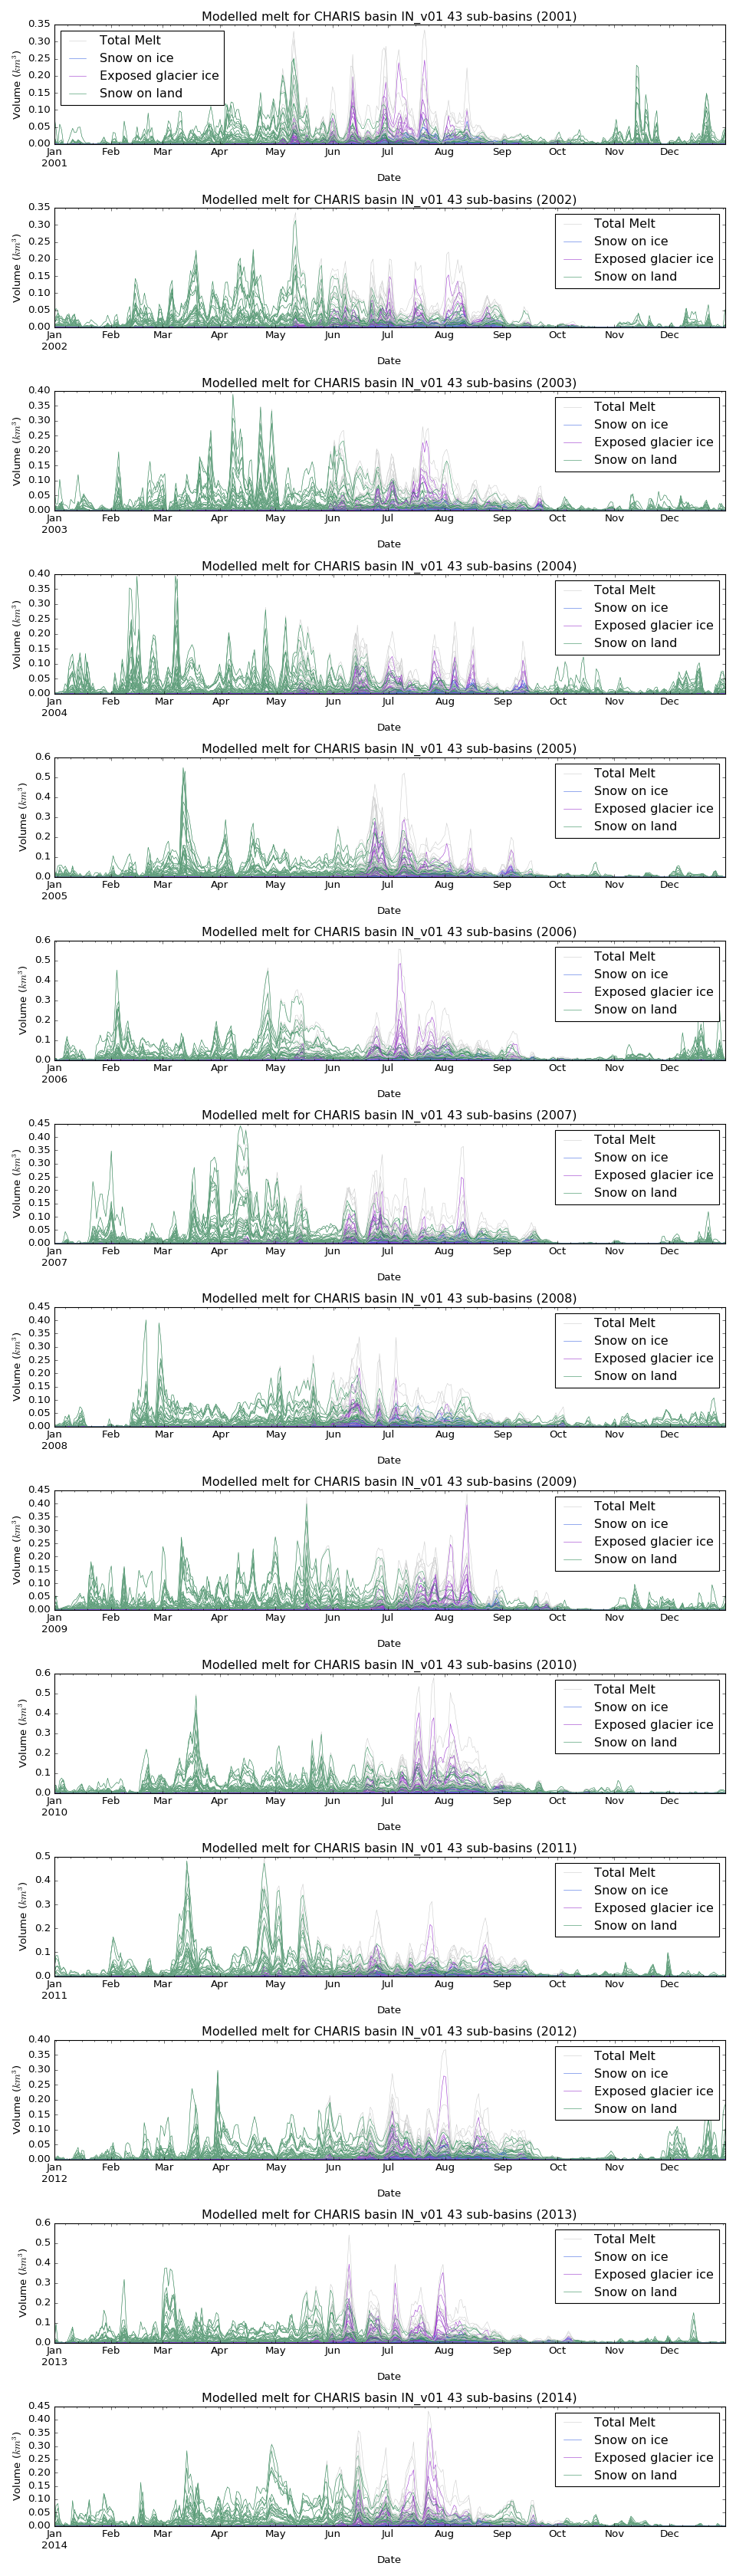

(2001, 'IN_v01_OBJECTID0')
(2001, 'IN_v01_OBJECTID10')
(2001, 'IN_v01_OBJECTID11')
(2001, 'IN_v01_OBJECTID12')
(2001, 'IN_v01_OBJECTID13')
(2001, 'IN_v01_OBJECTID14')
(2001, 'IN_v01_OBJECTID17')
(2001, 'IN_v01_OBJECTID18')
(2001, 'IN_v01_OBJECTID19')
(2001, 'IN_v01_OBJECTID2')
(2001, 'IN_v01_OBJECTID20')
(2001, 'IN_v01_OBJECTID21')
(2001, 'IN_v01_OBJECTID23')
(2001, 'IN_v01_OBJECTID24')
(2001, 'IN_v01_OBJECTID25')
(2001, 'IN_v01_OBJECTID26')
(2001, 'IN_v01_OBJECTID27')
(2001, 'IN_v01_OBJECTID29')
(2001, 'IN_v01_OBJECTID30')
(2001, 'IN_v01_OBJECTID31')
(2001, 'IN_v01_OBJECTID32')
(2001, 'IN_v01_OBJECTID33')
(2001, 'IN_v01_OBJECTID34')
(2001, 'IN_v01_OBJECTID36')
(2001, 'IN_v01_OBJECTID37')
(2001, 'IN_v01_OBJECTID39')
(2001, 'IN_v01_OBJECTID4')
(2001, 'IN_v01_OBJECTID44')
(2001, 'IN_v01_OBJECTID47')
(2001, 'IN_v01_OBJECTID48')
(2001, 'IN_v01_OBJECTID53')
(2001, 'IN_v01_OBJECTID56')
(2001, 'IN_v01_OBJECTID57')
(2001, 'IN_v01_OBJECTID58')
(2001, 'IN_v01_OBJECTID59')
(2001, 'IN_v01_OBJECTID

In [8]:
years = np.arange(14) + 2001
fig, ax = plt.subplots(len(years),1, figsize=(12,3*len(years)))
for j, year in enumerate(years):
    # For each basin, get the 3 tri-surf melt files
    for i, drainageID in enumerate(drainageIDs):
        solfile = glob.glob("%s/%s.%d.*snow_on_land_melt_by_elev*" % (drainageID, drainageID, year))
        soifile = glob.glob("%s/%s.%d.*snow_on_ice_melt_by_elev*" % (drainageID, drainageID, year))
        egifile = glob.glob("%s/%s.%d.*exposed_glacier_ice_melt_by_elev*" % (drainageID, drainageID, year))
        print(year, drainageID)
        SOLmelt = Hypsometry(filename=solfile[0])
        SOImelt = Hypsometry(filename=soifile[0])
        EGImelt = Hypsometry(filename=egifile[0])
        # If SOLmelt is non-empty, but SOImelt and SGImelt are empty,
        # then make a copy of the dimensions of SOLmelt that is filled with zeroes
        if not SOLmelt.data.empty and SOImelt.data.empty and EGImelt.data.empty:
            SOImelt.data = SOLmelt.data.copy()
            SOImelt.data[:] = 0.
            EGImelt.data = SOLmelt.data.copy()
            EGImelt.data[:] = 0.
        if i == 0:
            title = "Modelled melt for CHARIS basin %s %d sub-basins (%d)" % (
                majorBasinID, len(drainageIDs), year)
        else:
            title = None
        ax[j] = PlotTriSurfMelt(ax[j], SOLmelt, SOImelt, EGImelt, title=title, linewidth=0.5)
        handles, labels = ax[j].get_legend_handles_labels()
        ax[j].legend(handles[:4], labels[:4], loc='best')
        
fig.tight_layout()
    
